**Ahsanul Haque Farhan | P2648986**

In [ ]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [ ]:
# df= pd.read_csv('./sample_data/preProcessedFile.csv')
# df 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df= pd.read_csv('drive/MyDrive/preProcessedFile.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,call_failure,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,customer_value,complains,subs_length,charge_amount,tariff_plan,status,age,Churn
0,0,8.0,4370.0,71.0,5.000000,17.0,197.640,0,38,0,1,1,30,0
1,1,0.0,318.0,5.0,7.000000,4.0,46.035,0,39,0,1,2,25,0
2,2,10.0,2453.0,60.0,73.174921,24.0,1536.520,0,37,0,1,1,30,0
3,3,10.0,4198.0,66.0,1.000000,35.0,240.020,0,38,0,1,1,15,0
4,4,3.0,2393.0,58.0,2.000000,33.0,145.805,0,38,0,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3145,21.0,6697.0,147.0,92.000000,44.0,721.980,0,19,2,2,1,25,0
3146,3146,17.0,9237.0,177.0,80.000000,42.0,261.210,0,17,1,1,1,55,0
3147,3147,13.0,3157.0,51.0,38.000000,21.0,280.320,0,18,4,1,1,30,0
3148,3148,7.0,4695.0,46.0,73.174921,12.0,1077.640,0,11,2,1,1,30,0


In [ ]:
#import sklearn methods
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import sys 

In [ ]:
y = df.loc[:, 'Churn'].values # select all the rows in Churn Columns and get the value
X = df.drop('Churn', axis=1)

#################################################
# spliting dataset into 80/20%, training/test   #
#################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)



########################################################
# Cross validation                                     #
# spliting 8 reshuffling| default = 10                 #
# random_state control the randomness                  #
# Cross Validation, Spliting into multiple time        #
########################################################

cv = StratifiedShuffleSplit(n_splits=12, random_state = 12) 


###############################################
#hold-out validation, Spliting Once at a time #
###############################################

hold_out = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = 25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit(X_train, X_test)

updated_X_train_arr = scaler.transform(X_train)
updated_X_train_df  = pd.DataFrame(updated_X_train_arr, columns=list(X.columns))
updated_X_test_arr  = scaler.transform(X_test)
updated_X_test_df   = pd.DataFrame(updated_X_test_arr, columns=list(X.columns))

In [ ]:
updated_X_train_df

,Unnamed: 0,call_failure,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,customer_value,complains,subs_length,charge_amount,tariff_plan,status,age
0,0.110229,0.000000,0.293366,0.153061,0.961538,0.057143,0.544930,0.0,0.000000,0.0,0.0,0.0,0.375
1,0.284943,0.285714,0.362267,0.260204,0.351803,0.142857,0.619158,0.0,0.159091,0.2,0.0,0.0,0.375
2,0.446633,0.357143,0.638585,0.627551,0.711538,0.657143,0.539359,0.0,0.795455,0.1,0.0,0.0,0.375
3,0.799238,0.178571,0.059312,0.061224,0.043269,0.071429,0.039404,0.0,0.772727,0.0,0.0,1.0,0.375
4,0.718551,0.357143,0.247194,0.178571,0.351803,0.200000,0.754395,0.0,0.931818,0.3,0.0,0.0,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,0.340851,0.285714,0.391604,0.469388,0.091346,0.314286,0.190435,1.0,0.704545,0.0,0.0,0.0,0.250
2516,0.931703,0.464286,0.516409,0.653061,0.351803,0.514286,0.811936,0.0,0.863636,0.5,1.0,0.0,0.375
2517,0.492376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.772727,0.0,0.0,1.0,0.250
2518,0.510801,0.071429,0.307217,0.423469,0.129808,0.385714,0.160321,0.0,0.772727,0.1,0.0,0.0,0.375


In [ ]:
updated_X_test_df 

,Unnamed: 0,call_failure,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,customer_value,complains,subs_length,charge_amount,tariff_plan,status,age
0,0.800508,0.392857,0.486078,0.372449,0.500000,0.485714,0.439383,0.0,0.750000,0.2,0.0,0.0,0.250
1,0.033037,0.285714,0.263887,0.403061,0.129808,0.371429,0.146472,0.0,0.750000,0.0,0.0,0.0,0.375
2,0.264295,0.964286,0.317691,0.354391,0.038462,0.335855,0.434385,0.0,0.750000,0.4,0.0,0.0,0.250
3,0.863723,0.428571,0.827887,0.785714,0.033654,0.642857,0.282141,0.0,0.795455,0.1,0.0,0.0,0.375
4,0.339263,0.000000,0.511649,0.617347,0.351803,0.585714,0.265570,0.0,0.727273,0.0,0.0,0.0,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.564168,0.071429,0.125941,0.188776,0.086538,0.371429,0.081424,0.0,0.704545,0.0,0.0,1.0,0.375
626,0.500000,0.000000,0.137449,0.030612,0.000000,0.028571,0.043779,0.0,0.659091,0.0,0.0,0.0,0.375
627,0.932338,0.357143,0.139935,0.285714,0.254808,0.328571,0.103274,0.0,0.886364,0.0,0.0,1.0,0.750
628,0.731576,0.250000,0.185964,0.316327,0.033654,0.442857,0.085766,0.0,0.750000,0.1,0.0,0.0,0.250


**Helper Functionn**

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   BackgroundLightGreen   = "\033[102m"
   BackgroundLightYellow  = "\033[103m"
   BackgroundLightBlue    = "\033[104m"
   BackgroundLightMagenta = "\033[105m"

print(color.BOLD + 'Successfully Run...... !' + color.END)

def get_best_parameters(grid):
  print(color.BOLD+"The Best Parameters Are: %s" % (grid.best_params_))

# display test scores and return result string and indexes of false samples
def get_results(test, prediction):
    str_out = "\n"
    str_out += (color.BackgroundLightGreen + 'SCORES DETAILS' + color.END)
    str_out += ("\n \n")

    #print accuracy
    accuracy = accuracy_score(test, prediction)
    str_out += (color.GREEN + "ACCURACY: {:.2f}\n".format(accuracy) + color.END)

    #print AUC score
    auc = roc_auc_score(test, prediction)
    str_out += (color.PURPLE + "AUC: {:.4f}\n".format(auc) + color.END)
    str_out += ("\n")

    #print confusion matrix
    conf_mat = confusion_matrix(test, prediction)
    cm_matrix = pd.DataFrame(conf_mat, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
    sns.heatmap(cm_matrix, annot = True, fmt='d', cmap='BrBG')


#print classification report
    str_out += ("{}".format(classification_report(test, prediction)))
    str_out += (color.UNDERLINE+ "\n \nCONFUSION MATRIX:\n" +color.END)
    
    false_indexes = np.where(test != prediction)
    return str_out, false_indexes

Successfully Run...... !


**Logistic** **Regression**

Import Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

The Best Parameters Are: {'C': 10}

SCORES DETAILS
 
ACCURACY: 0.90
AUC: 0.7087

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.83      0.43      0.57        99

    accuracy                           0.90       630
   macro avg       0.87      0.71      0.76       630
weighted avg       0.89      0.90      0.88       630

 
CONFUSION MATRIX:



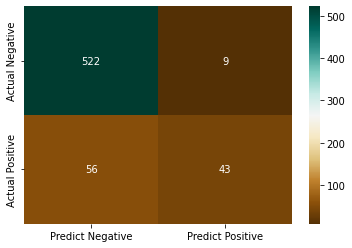

In [ ]:
# Logistic regression
lr = LogisticRegression(random_state = 50, max_iter=1000, tol=0.1)

# parameters 
lr_param_grid = [ {'C' : [10, 100, 300, 500, 800] } ]


# grid search for parameters
grid_1 = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=cv)
grid_1.fit(updated_X_train_df, y_train)

get_best_parameters(grid_1)

y_pred = grid_1.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Logistic Regression (Holdout)**

The Best Parameters Are: {'C': 10}

SCORES DETAILS
 
ACCURACY: 0.90
AUC: 0.7087

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.83      0.43      0.57        99

    accuracy                           0.90       630
   macro avg       0.87      0.71      0.76       630
weighted avg       0.89      0.90      0.88       630

 
CONFUSION MATRIX:



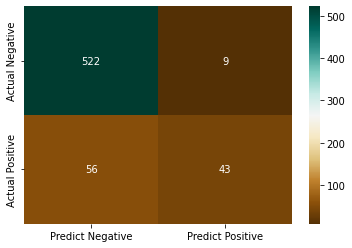

In [ ]:
grid_1_h = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=hold_out)
grid_1_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_1_h)

# prediction results
y_pred = grid_1_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)

**Decession Trees**

Import Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB

The Best Parameters Are: {'class_weight': None, 'max_depth': 10, 'splitter': 'random'}

SCORES DETAILS
 
ACCURACY: 0.93
AUC: 0.8612

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       531
           1       0.76      0.77      0.76        99

    accuracy                           0.93       630
   macro avg       0.86      0.86      0.86       630
weighted avg       0.93      0.93      0.93       630

 
CONFUSION MATRIX:



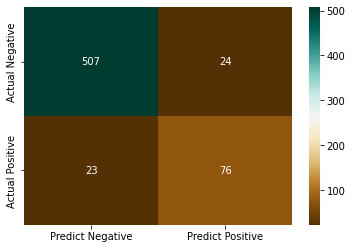

In [ ]:
# decision tree using "gini"
dt_gini = DecisionTreeClassifier(random_state = 20, criterion="gini")

# parameters 
param_grids = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [1, 3, 5, 7, 10],
              }

#Grid search for parameters
grid_2 = GridSearchCV(estimator=dt_gini, param_grid=param_grids, cv=cv)
grid_2.fit(updated_X_train_df, y_train)

get_best_parameters(grid_2)

y_pred = grid_2.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

The Best Parameters Are: {'class_weight': None, 'max_depth': 0.1, 'splitter': 'best'}

SCORES DETAILS
 
ACCURACY: 0.84
AUC: 0.5000

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       531
           1       0.00      0.00      0.00        99

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

 
CONFUSION MATRIX:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


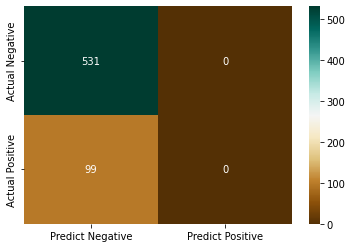

In [ ]:
# decision tree using "entropy"
dt_entropy = DecisionTreeClassifier(random_state = 10, criterion="entropy")

# parameters 
param_grids = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [0.1, 0.3, 0.5, 0.9, 1]
              }

# grid search for parameters
grid_3 = GridSearchCV(estimator=dt_entropy, param_grid=param_grids, cv=cv)
grid_3.fit(updated_X_train_df, y_train)


# find best parameters and scores
get_best_parameters(grid_3)

y_pred = grid_3.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Decission Tree (Hold Out)**

The Best Parameters Are: {'class_weight': None, 'max_depth': 0.1, 'splitter': 'best'}

SCORES DETAILS
 
ACCURACY: 0.84
AUC: 0.5000

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       531
           1       0.00      0.00      0.00        99

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

 
CONFUSION MATRIX:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


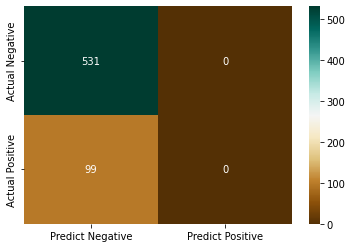

In [ ]:
grid_2_h = GridSearchCV(estimator=dt_gini, param_grid=param_grids, cv=hold_out)
grid_2_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_2_h)

# prediction results
y_pred = grid_2_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)



The Best Parameters Are: {'class_weight': None, 'max_depth': 0.1, 'splitter': 'best'}

SCORES DETAILS
 
ACCURACY: 0.84
AUC: 0.5000

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       531
           1       0.00      0.00      0.00        99

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

 
CONFUSION MATRIX:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


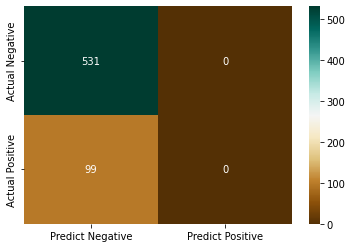

In [ ]:
grid_3_h = GridSearchCV(estimator=dt_entropy, param_grid=param_grids, cv=hold_out)
grid_3_h.fit(updated_X_train_df, y_train)

# find best parameters and scores
get_best_parameters(grid_3_h)

# prediction results
y_pred = grid_3_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)

[Text(0.6478209658421673, 0.9736842105263158, 'X[7] <= 0.5\ngini = 0.265\nsamples = 2520\nvalue = [2124, 396]'),
 Text(0.3710247349823322, 0.9210526315789473, 'X[11] <= 1.5\ngini = 0.18\nsamples = 2322\nvalue = [2090, 232]'),
 Text(0.15606595995288575, 0.868421052631579, 'X[8] <= 10.5\ngini = 0.055\nsamples = 1829\nvalue = [1777, 52]'),
 Text(0.13722025912838634, 0.8157894736842105, 'X[2] <= 2242.5\ngini = 0.425\nsamples = 62\nvalue = [43, 19]'),
 Text(0.12779740871613662, 0.7631578947368421, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.14664310954063603, 0.7631578947368421, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.17491166077738515, 0.8157894736842105, 'X[6] <= 434.833\ngini = 0.037\nsamples = 1767\nvalue = [1734, 33]'),
 Text(0.16548881036513546, 0.7631578947368421, 'X[6] <= 431.515\ngini = 0.066\nsamples = 969\nvalue = [936, 33]'),
 Text(0.15606595995288575, 0.7105263157894737, 'X[2] <= 4910.5\ngini = 0.062\nsamples = 967\nvalue = [936, 31]'),
 Text(0.076560659

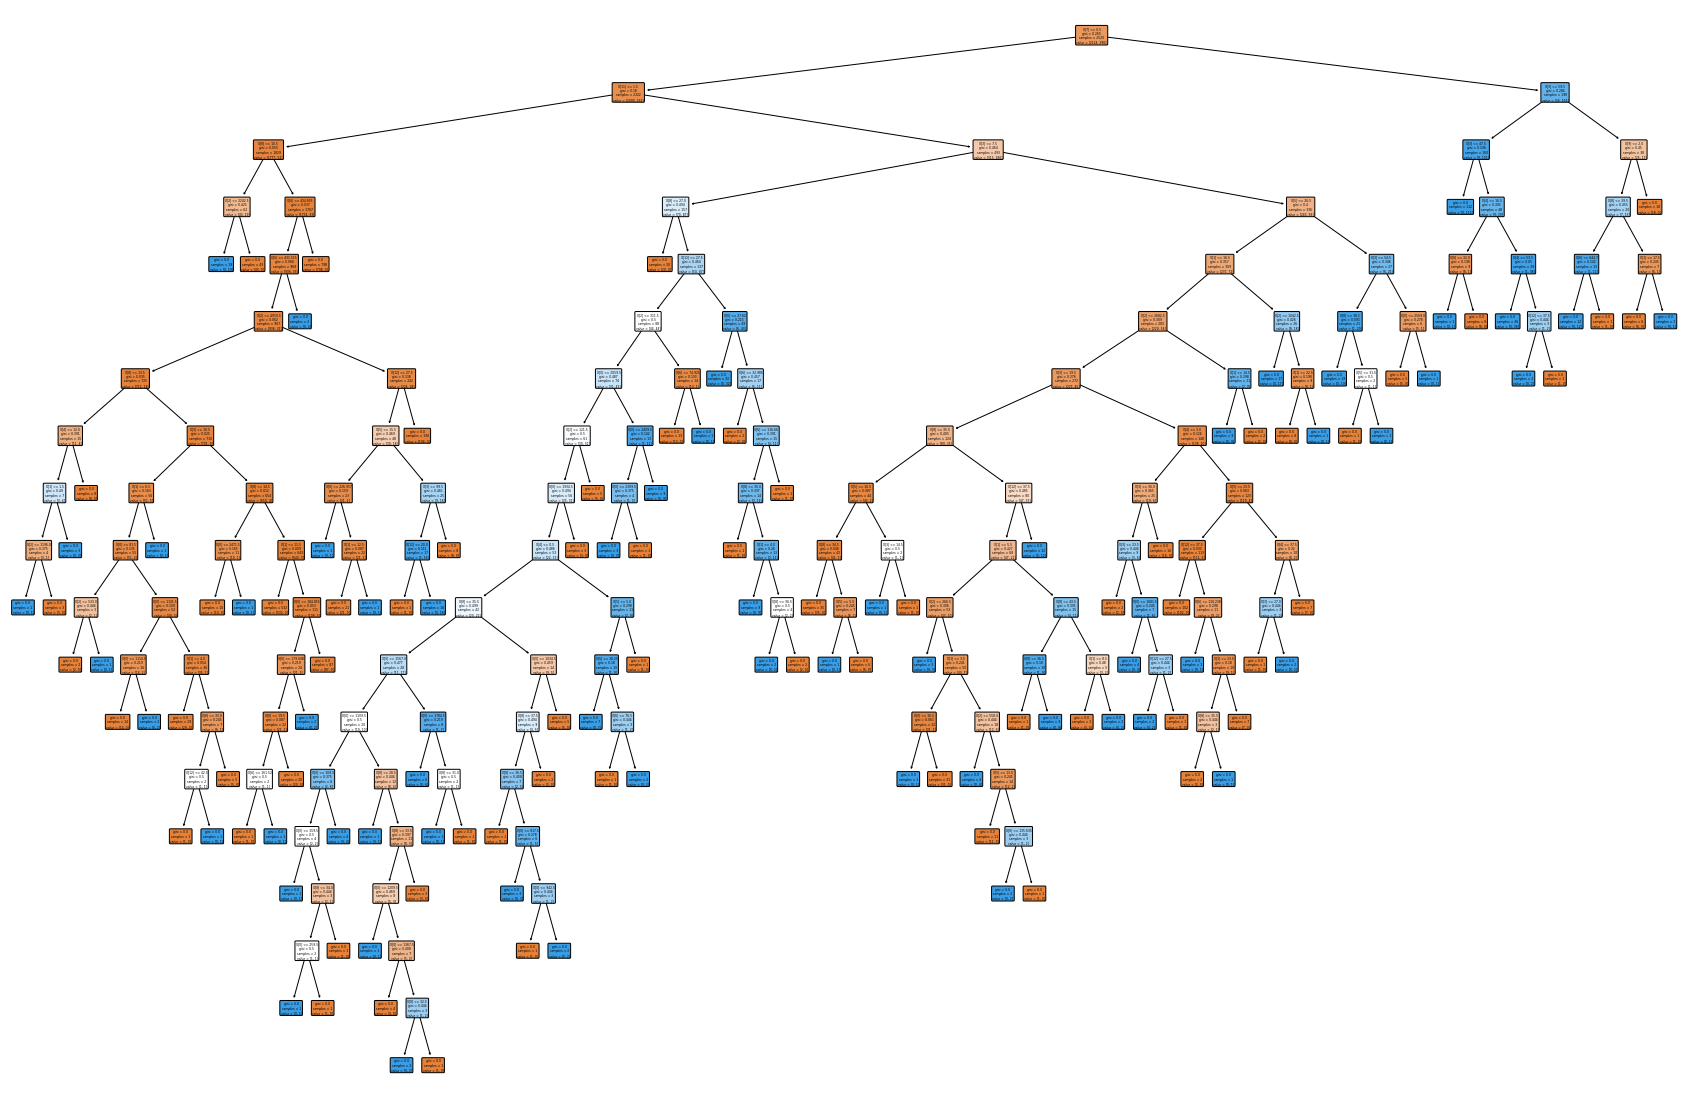

In [ ]:
plt.figure(figsize=(30,20))

from sklearn import tree

tree.plot_tree(dt_gini.fit(X_train, y_train),rounded=True ,filled = True) 

[Text(0.4588006652227723, 0.9705882352941176, 'X[11] <= 1.5\nentropy = 0.627\nsamples = 2520\nvalue = [2124, 396]'),
 Text(0.19616336633663367, 0.9117647058823529, 'X[7] <= 0.5\nentropy = 0.298\nsamples = 1896\nvalue = [1796, 100]'),
 Text(0.1349009900990099, 0.8529411764705882, 'X[8] <= 10.5\nentropy = 0.186\nsamples = 1829\nvalue = [1777, 52]'),
 Text(0.1150990099009901, 0.7941176470588235, 'X[2] <= 2242.5\nentropy = 0.889\nsamples = 62\nvalue = [43, 19]'),
 Text(0.1051980198019802, 0.7352941176470589, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.125, 0.7352941176470589, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.1547029702970297, 0.7941176470588235, 'X[6] <= 434.833\nentropy = 0.134\nsamples = 1767\nvalue = [1734, 33]'),
 Text(0.1448019801980198, 0.7352941176470589, 'X[2] <= 4910.5\nentropy = 0.214\nsamples = 969\nvalue = [936, 33]'),
 Text(0.07178217821782178, 0.6764705882352942, 'X[8] <= 14.5\nentropy = 0.13\nsamples = 725\nvalue = [712, 13]'),
 Text(0.03

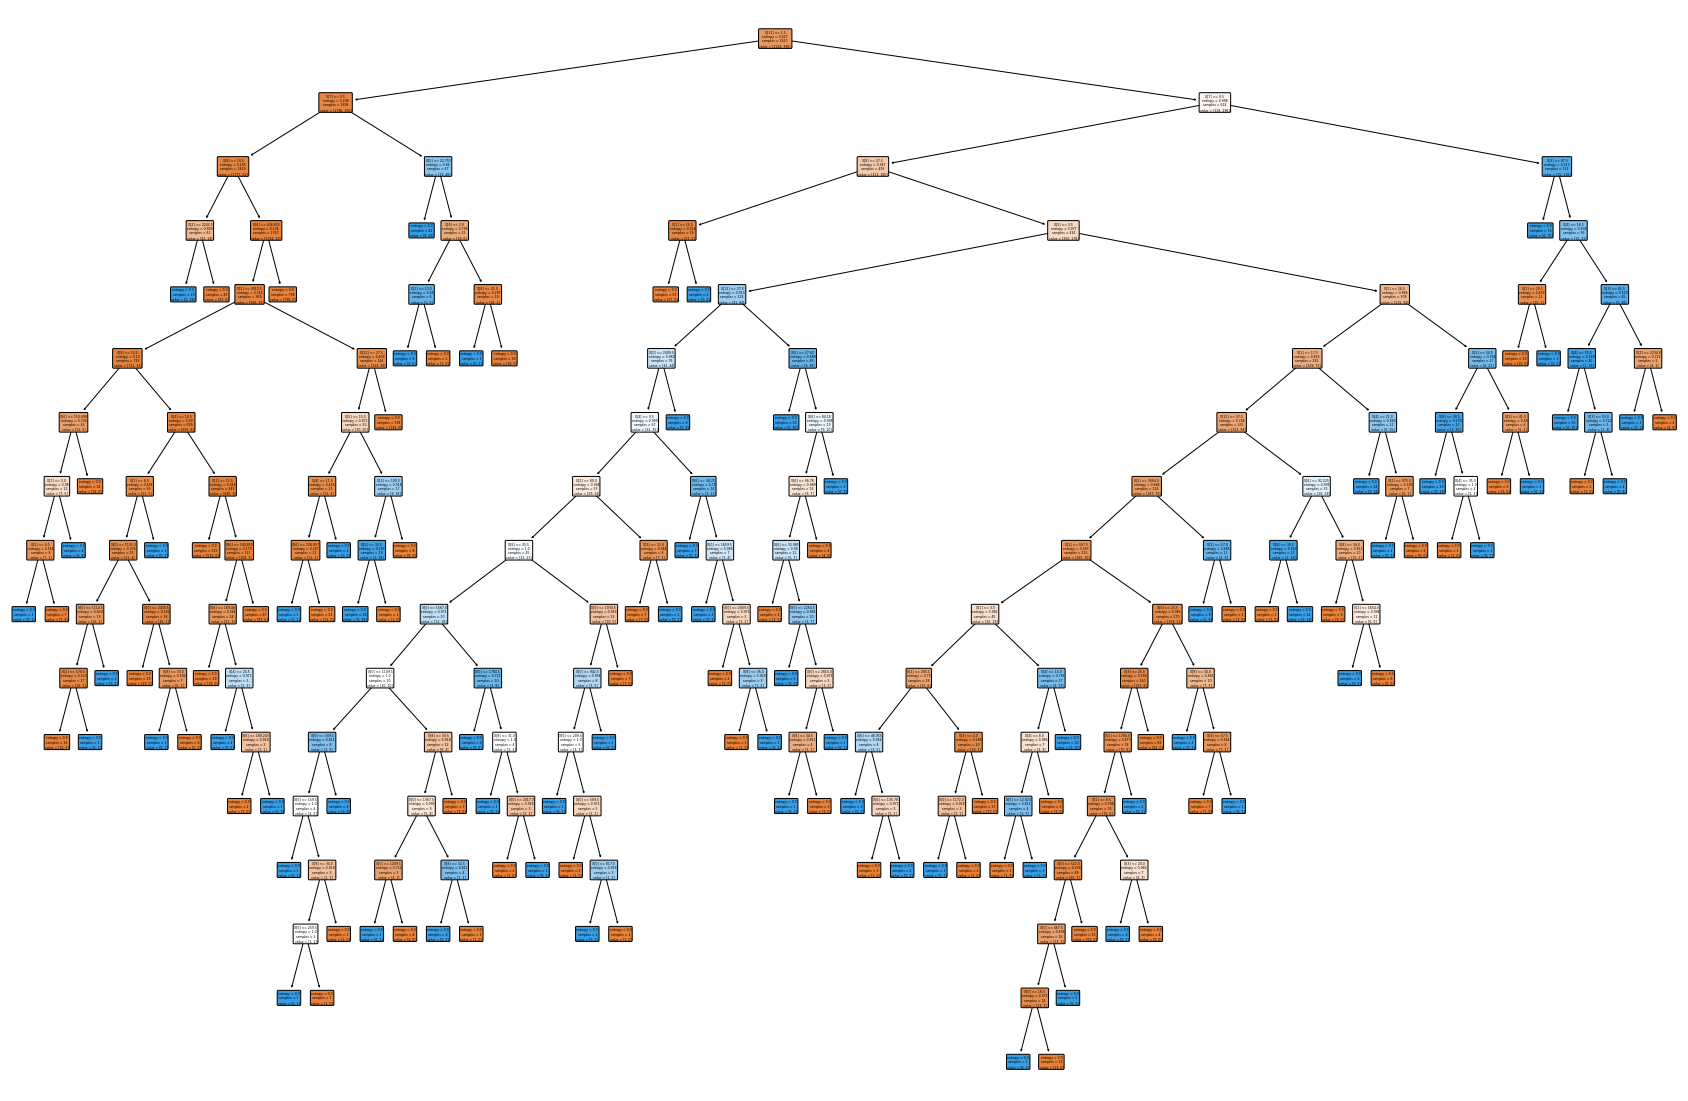

In [ ]:
plt.figure(figsize=(30,20))
tree.plot_tree(dt_entropy.fit(X_train, y_train),rounded=True ,filled = True) 

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

The Best Parameters Are: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 16, 'n_estimators': 40}

SCORES DETAILS
 
ACCURACY: 0.94
AUC: 0.9108

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       531
           1       0.77      0.87      0.82        99

    accuracy                           0.94       630
   macro avg       0.87      0.91      0.89       630
weighted avg       0.94      0.94      0.94       630

 
CONFUSION MATRIX:



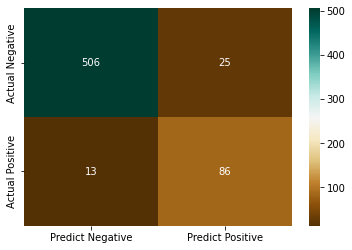

In [ ]:
rf = RandomForestClassifier(max_depth=5)

rf_param_grid = {"criterion":["gini", "entropy"],
                 "max_features":["auto", "sqrt", "log2"],
                 "class_weight":["balanced", "balanced_subsample"],               
                 "n_estimators":[10, 20, 30, 40],
                 "max_depth":[8, 10, 12],
                 "min_samples_split":[16, 18, 20, 22]
                }

# grid search for parameters
grid_4 = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=cv)
grid_4.fit(updated_X_train_df, y_train)

get_best_parameters(grid_4)

y_pred = grid_4.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Random Forest (Hold out)**

The Best Parameters Are: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 18, 'n_estimators': 40}

SCORES DETAILS
 
ACCURACY: 0.94
AUC: 0.9168

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       531
           1       0.78      0.88      0.83        99

    accuracy                           0.94       630
   macro avg       0.88      0.92      0.90       630
weighted avg       0.95      0.94      0.94       630

 
CONFUSION MATRIX:



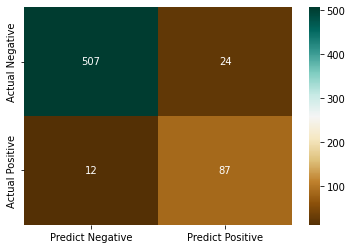

In [ ]:
grid_4_h = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=hold_out)
grid_4_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_4_h)

# prediction results
y_pred = grid_4_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)


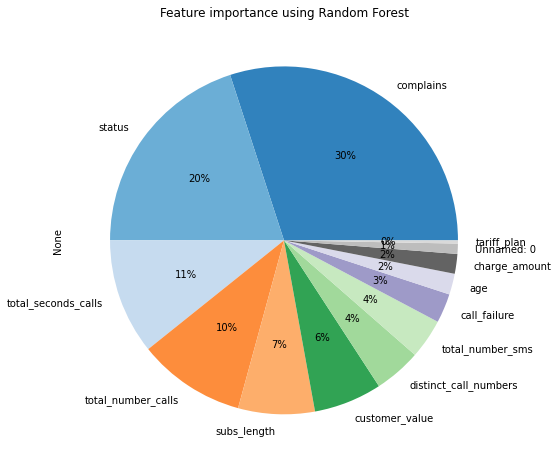

In [ ]:
rf.fit(updated_X_train_df, y_train)
rf_y_pred = rf.predict(updated_X_test_df)

rf_series = pd.Series(rf.feature_importances_, index = updated_X_train_df.columns)

rf_series.nlargest(15).plot(kind = 'pie',figsize = (8, 8), autopct = '%0.0f%%', title = 'Feature importance using Random Forest', colormap='tab20c')

**Support Vector Machine**

Importing file

In [ ]:
from sklearn.svm import LinearSVC,SVC

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: Converge

The Best Parameters Are: {'C': 100, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1200}

SCORES DETAILS
 
ACCURACY: 0.96
AUC: 0.9120

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.87      0.85      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630

 
CONFUSION MATRIX:



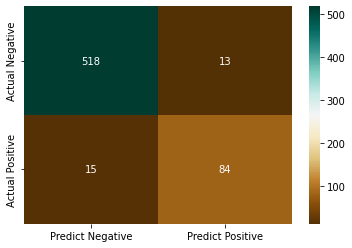

In [ ]:
svm = SVC()

# parameters 
svm_param_grid = {
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'max_iter': [200, 300, 500, 1000, 1200],
                  'gamma':['scale','auto'],
                  'class_weight': [None, 'balanced']
                  }

# grid search for parameters
grid_6 = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=cv)
grid_6.fit(updated_X_train_df, y_train)

get_best_parameters(grid_6)

y_pred = grid_6.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Support Vector Machine (Hold Out)**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).

The Best Parameters Are: {'C': 100, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1200}

SCORES DETAILS
 
ACCURACY: 0.96
AUC: 0.9120

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.87      0.85      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630

 
CONFUSION MATRIX:



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


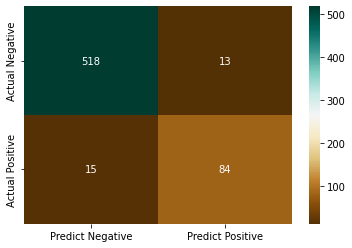

In [ ]:
grid_6_h = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=hold_out)
grid_6_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_6_h)

# prediction results
y_pred = grid_6_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)

# **K-neighbour**

The Best Parameters Are: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1.0}

SCORES DETAILS
 
ACCURACY: 0.95
AUC: 0.8877

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.87      0.80      0.83        99

    accuracy                           0.95       630
   macro avg       0.92      0.89      0.90       630
weighted avg       0.95      0.95      0.95       630

 
CONFUSION MATRIX:



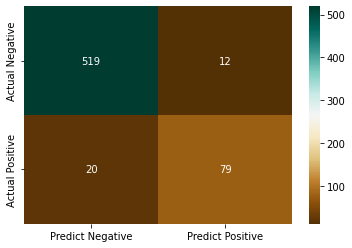

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# parameters 
kn_param_grid = {
                  "n_neighbors": range(3, 10, 1),
                  "metric": ["minkowski"],
                  "p": [1.0, 2.0],
                  "algorithm": ["auto", "brute", "kd_tree", "ball_tree"]
                  }

# grid search for parameters
grid_7 = GridSearchCV(estimator=kn, param_grid=kn_param_grid, cv=cv)
grid_7.fit(updated_X_train_df, y_train)

# find best parameters and scores
get_best_parameters(grid_7)

y_pred = grid_7.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**K-neighbour (Holdout)**

The Best Parameters Are: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1.0}

SCORES DETAILS
 
ACCURACY: 0.95
AUC: 0.8877

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.87      0.80      0.83        99

    accuracy                           0.95       630
   macro avg       0.92      0.89      0.90       630
weighted avg       0.95      0.95      0.95       630

 
CONFUSION MATRIX:



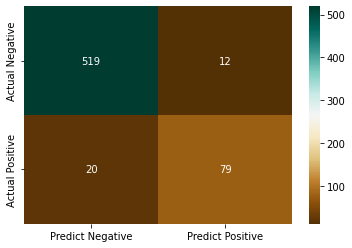

In [ ]:
grid_7_h = GridSearchCV(estimator=kn, param_grid=kn_param_grid, cv=hold_out)
grid_7_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_7_h)

# prediction results
y_pred = grid_7_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)

**Naive bayes** **(GaussianNB)**

The Best Parameters Are: {}

SCORES DETAILS
 
ACCURACY: 0.77
AUC: 0.8315

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       531
           1       0.40      0.92      0.56        99

    accuracy                           0.77       630
   macro avg       0.69      0.83      0.70       630
weighted avg       0.89      0.77      0.80       630

 
CONFUSION MATRIX:



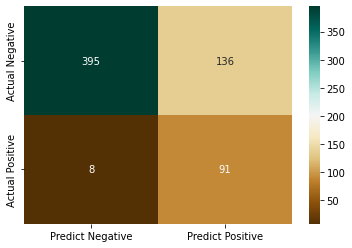

In [ ]:
# grid search for GaussianNB()
grid_8_GNB = GridSearchCV(estimator= GaussianNB(), param_grid={}, cv=cv)
grid_8_GNB.fit(updated_X_train_df, y_train)

get_best_parameters(grid_8_GNB)

y_pred = grid_8_GNB.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)


**Naive Bayes (MultinomialNB)**


SCORES DETAILS
 
ACCURACY: 0.91
AUC: 0.7102

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       531
           1       0.95      0.42      0.59        99

    accuracy                           0.91       630
   macro avg       0.93      0.71      0.77       630
weighted avg       0.91      0.91      0.89       630

 
CONFUSION MATRIX:



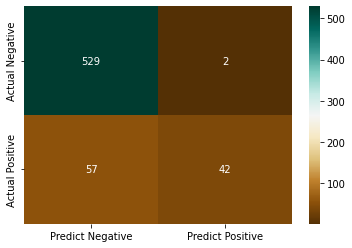

In [ ]:
# grid search for MultinomialNB()
grid_8_MNB = GridSearchCV(estimator= MultinomialNB(), param_grid={}, cv=cv)
grid_8_MNB.fit(updated_X_train_df, y_train)

y_pred = grid_8_MNB.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Naive Bayes ( ComplementNB )**

The Best Parameters Are: {}

SCORES DETAILS
 
ACCURACY: 0.85
AUC: 0.8612

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       531
           1       0.51      0.88      0.65        99

    accuracy                           0.85       630
   macro avg       0.74      0.86      0.78       630
weighted avg       0.90      0.85      0.86       630

 
CONFUSION MATRIX:



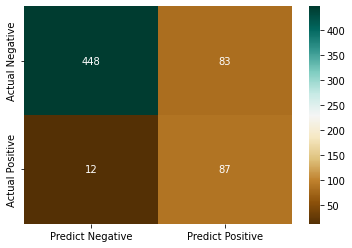

In [ ]:
# grid search for ComplementNB()
grid_8_CNB = GridSearchCV(estimator=ComplementNB(), param_grid={}, cv=cv)
grid_8_CNB.fit(updated_X_train_df, y_train)

get_best_parameters(grid_8_CNB)

y_pred = grid_8_CNB.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Naive bayes (GaussianNB) Holdout**

The Best Parameters Are: {}

SCORES DETAILS
 
ACCURACY: 0.77
AUC: 0.8315

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       531
           1       0.40      0.92      0.56        99

    accuracy                           0.77       630
   macro avg       0.69      0.83      0.70       630
weighted avg       0.89      0.77      0.80       630

 
CONFUSION MATRIX:



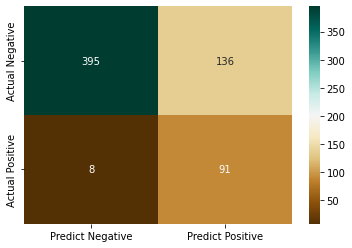

In [ ]:
# grid search for GaussianNB() holdout
grid_8_h = GridSearchCV(estimator= GaussianNB(), param_grid={}, cv=hold_out)
grid_8_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_8_h)

y_pred = grid_8_h.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Naive bayes (MultinomialNB) holdout**

The Best Parameters Are: {}

SCORES DETAILS
 
ACCURACY: 0.91
AUC: 0.7102

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       531
           1       0.95      0.42      0.59        99

    accuracy                           0.91       630
   macro avg       0.93      0.71      0.77       630
weighted avg       0.91      0.91      0.89       630

 
CONFUSION MATRIX:



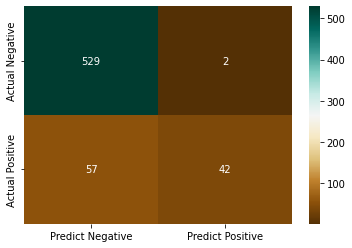

In [ ]:
# grid search for MultinomialNB()
grid_8_h = GridSearchCV(estimator= MultinomialNB(), param_grid={}, cv=hold_out)
grid_8_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_8_h)

y_pred = grid_8_h.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**Naive Bayes ( ComplementNB ) Holdout**

The Best Parameters Are: {}

SCORES DETAILS
 
ACCURACY: 0.85
AUC: 0.8612

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       531
           1       0.51      0.88      0.65        99

    accuracy                           0.85       630
   macro avg       0.74      0.86      0.78       630
weighted avg       0.90      0.85      0.86       630

 
CONFUSION MATRIX:



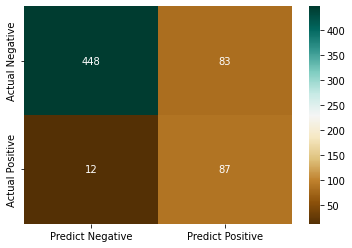

In [ ]:
# grid search for ComplementNB() holdout
grid_8_h = GridSearchCV(estimator=ComplementNB(), param_grid={}, cv=hold_out)
grid_8_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_8_h)

y_pred = grid_8_h.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**ANN (Layer 1)**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

The Best Parameters Are: {'alpha': 1, 'hidden_layer_sizes': (100,)}

SCORES DETAILS
 
ACCURACY: 0.90
AUC: 0.7005

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.85      0.41      0.56        99

    accuracy                           0.90       630
   macro avg       0.88      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630

 
CONFUSION MATRIX:



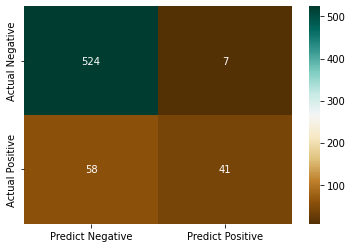

In [ ]:
# ANN (Layer 1)
ann1 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh')

# parameters
ann1_param_grid = [ 
                    {
                      'hidden_layer_sizes': [(10,),(50,),(100,)],
                      'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
                    } 
                  ]


# grid search for parameters
grid_9 = GridSearchCV(estimator=ann1, param_grid=ann1_param_grid, cv=cv)
grid_9.fit(updated_X_train_df, y_train)

get_best_parameters(grid_9)

y_pred = grid_9.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**ANN (Layer 1)(Hold Out)**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

The Best Parameters Are: {'alpha': 1, 'hidden_layer_sizes': (10,)}

SCORES DETAILS
 
ACCURACY: 0.90
AUC: 0.7005

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.85      0.41      0.56        99

    accuracy                           0.90       630
   macro avg       0.88      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630

 
CONFUSION MATRIX:



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


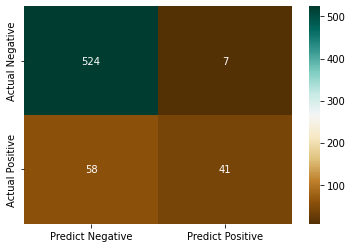

In [ ]:
grid_9_h = GridSearchCV(estimator=ann1, param_grid=ann1_param_grid, cv=hold_out)
grid_9_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_9_h)

# prediction results
y_pred = grid_9_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)

**ANN2 (Layer 2)**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

The Best Parameters Are: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

SCORES DETAILS
 
ACCURACY: 0.90
AUC: 0.7937

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.71      0.64      0.67        99

    accuracy                           0.90       630
   macro avg       0.82      0.79      0.81       630
weighted avg       0.90      0.90      0.90       630

 
CONFUSION MATRIX:



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


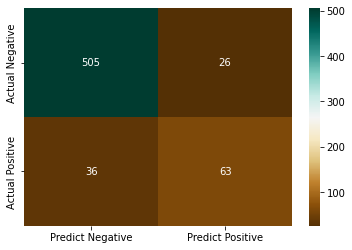

In [ ]:
# ANN (Layer 2)
ann2 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh')

# parameters 
ann2_param_grid = [ 
                    {
                     'hidden_layer_sizes': [(10, 10),(50, 50),(100, 100)],
                      'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
                    } 
                  ]


# grid search for parameters
grid_10 = GridSearchCV(estimator=ann2, param_grid=ann2_param_grid, cv=cv)
grid_10.fit(updated_X_train_df, y_train)

get_best_parameters(grid_10)

y_pred = grid_10.predict(updated_X_test_df)
results, false = get_results(y_test, y_pred)

print(results)

**ANN ( Layer 2) ( Holdout)**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

The Best Parameters Are: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

SCORES DETAILS
 
ACCURACY: 0.90
AUC: 0.7937

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.71      0.64      0.67        99

    accuracy                           0.90       630
   macro avg       0.82      0.79      0.81       630
weighted avg       0.90      0.90      0.90       630

 
CONFUSION MATRIX:



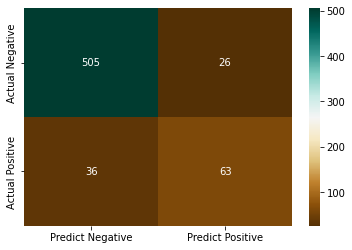

In [ ]:
grid_10_h = GridSearchCV(estimator=ann2, param_grid=ann2_param_grid, cv=hold_out)
grid_10_h.fit(updated_X_train_df, y_train)

get_best_parameters(grid_10_h)

# prediction results
y_pred = grid_10_h.predict(updated_X_test_df)

results, false = get_results(y_test, y_pred)

print(results)

**Ensemble Techniques**

**Bagging**


In [ ]:
indexes=X_train.index.values
rep = np.array([np.random.choice(indexes, len(indexes), replace = True) for _ in range(9)])

#rep_x_train has 6 dfs 
rep_x_train=[df.iloc[arr,:-1] for arr in rep]
rep_y_train=[df.iloc[arr,-1] for arr in rep]

#dfs are created by bootstrapping
rep_x_train[0].duplicated()
rep_y_train[0].duplicated()

2111    False
1135     True
2282     True
2604     True
463      True
        ...  
1404     True
1430     True
876      True
133      True
2984     True
Name: Churn, Length: 2520, dtype: bool

In [ ]:
preds=[]

#####################################
model_1 = grid_1.best_estimator_
model_1.fit(rep_x_train[0], rep_y_train[0])

pred_1=model_1.predict(X_test)
preds.append(pred_1)

#####################################

model_2 = grid_2.best_estimator_
model_2.fit(rep_x_train[1], rep_y_train[1])

pred_2=model_2.predict(X_test)
preds.append(pred_2)

#####################################
model_3 = grid_3.best_estimator_
model_3.fit(rep_x_train[2], rep_y_train[2])

pred_3=model_3.predict(X_test)
preds.append(pred_3)

###############################

model_4 = grid_4.best_estimator_
model_4.fit(rep_x_train[3], rep_y_train[3])

pred_4=model_4.predict(X_test)
preds.append(pred_4)

###############################

model_6 = grid_6.best_estimator_
model_6.fit(rep_x_train[4], rep_y_train[4])

pred_6=model_6.predict(X_test)
preds.append(pred_6)

###############################

model_7 = grid_7.best_estimator_
model_7.fit(rep_x_train[5], rep_y_train[5])

pred_7=model_7.predict(X_test)
preds.append(pred_7)

###############################

model_8 = grid_8_MNB.best_estimator_
model_8.fit(rep_x_train[6], rep_y_train[6])

pred_8=model_8.predict(X_test)
preds.append(pred_8)

###############################

model_9 = grid_9.best_estimator_
model_9.fit(rep_x_train[7], rep_y_train[7])

pred_9=model_9.predict(X_test)
preds.append(pred_9)

###############################

model_10 = grid_10.best_estimator_
model_10.fit(rep_x_train[8], rep_y_train[8])

pred_10=model_10.predict(X_test)
preds.append(pred_10)

###############################

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



SCORES DETAILS
 
ACCURACY: 0.86
AUC: 0.5985

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       531
           1       0.72      0.21      0.33        99

    accuracy                           0.86       630
   macro avg       0.80      0.60      0.63       630
weighted avg       0.85      0.86      0.83       630

 
CONFUSION MATRIX:



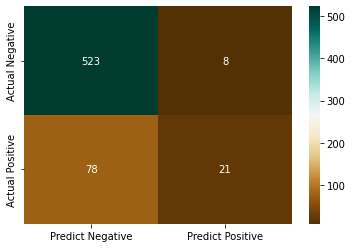

In [ ]:
arr_preds=np.array(preds)
arr_preds_mean=arr_preds.mean(axis=0)

# print accuracy metrics
results, false = get_results(y_test, arr_preds_mean.round())
print(results)

**Boosting**

Helper Function

In [ ]:

def boosting_step(grid, initial_weight, X_train, y_train):
    
    # Initialize the weights of each sample with wi = 1/N and 
    df_eval = pd.DataFrame(y_train, columns=["target"])
    df_eval['weights'] = initial_weight 

 
 
    model = grid.best_estimator_
    model.fit(X_train, y_train)
    pred=model.predict(X_train)
    score = model.score(X_train,y_train)

    #add values to the df_eval
    df_eval['predictions'] = pred
    df_eval['evaluation'] = np.where(df_eval['predictions'] == df_eval['target'], 1, 0)
    df_eval['misclassified'] = np.where(df_eval['predictions'] != df_eval['target'], 1, 0)

    #cal the misclassification rate and accuracy
    accuracy = sum(df_eval['evaluation']) / len(df_eval['evaluation'])
    misclassification = sum(df_eval['misclassified']) / len(df_eval['misclassified'])

    #error
    err = np.sum(df_eval['weights'] * df_eval['misclassified']) / np.sum(df_eval['weights'])

    alpha = np.log((1-err) / err)
    df_eval['weights'] *= np.exp(alpha * df_eval['misclassified'])
    prediction = alpha * df_eval["predictions"]

    return prediction, df_eval['weights']

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



SCORES DETAILS
 
ACCURACY: 0.97
AUC: 0.9349

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2124
           1       0.91      0.89      0.90       396

    accuracy                           0.97      2520
   macro avg       0.94      0.93      0.94      2520
weighted avg       0.97      0.97      0.97      2520

 
CONFUSION MATRIX:



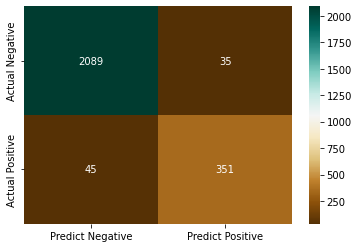

In [ ]:
#pred_1, w_1 = boosting_step(grid_1, 1/len(y_train), X_train, y_train)

pred_2, w_2=boosting_step(grid_2, 1/len(y_train), X_train, y_train)

#pred_3, w_3=boosting_step(grid_3, w_2, X_train, y_train)

pred_4, w_4=boosting_step(grid_4, w_2, X_train, y_train)

pred_6, w_6=boosting_step(grid_6, w_4, X_train, y_train)

pred_7, w_7=boosting_step(grid_4, w_6, X_train, y_train)

pred_8, w_8=boosting_step(grid_8_MNB, w_7, X_train, y_train)

pred_9, w_9=boosting_step(grid_9, w_8, X_train, y_train)

pred_10, w_10=boosting_step(grid_10, w_9, X_train, y_train)


pred_final=(pred_2+pred_4+pred_6+pred_7+pred_8+pred_9+pred_10) / 7

pred_final=np.where(pred_final >=0.5, 1, 0)

# print accuracy metrics
results, false = get_results(y_train, pred_final)
print(results)